<a href="https://colab.research.google.com/github/Biswamitra4599/MRI_Literature_Review/blob/main/Literature_Review_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd



In [16]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [17]:
# Open the Google Sheet by its name or URL
spreadsheet = gc.open('MRI Literature Reviews') # Or gc.open_by_url('your_sheet_url')
worksheet = spreadsheet.worksheet('Stats') # Replace 'Sheet1' with your sheet name


In [18]:
# print(worksheet.get_all_values())

In [19]:
# Get all values and convert to a Pandas DataFrame
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows)

# If the first row contains headers, you can set them as column names
df.columns = df.iloc[0]
df = df.iloc[1:]
print(df.head())

0 INDEX                                              Paper     Type  \
1     1                                            BGRAPPA  K space   
2     2  Deep learning MRI halves scan time…” — more ge...  K space   
3     3                            Zero-Shot Diffusion MRI  K space   
4     4               Diffusion Posterior Sampling for MRI  K space   
5     5  Deep Learning Superresolution for Simultaneous...  K space   

0     Model type                      Comparison Methods   Datasets Used  \
1    Statistical                                  GRAPPA       Synthetic   
2  Deep Learning                                   C-MRI  SELF Made (NA)   
3  Deep Learning  BCS, 3D-CSC, TGVNN, DLTG, DD_UGM, SSUD    OCMR Dataset   
4  Deep Learning                                                           
5  Deep Learning                                      NA       Self Made   

0     Metrics Used                                        Type of MRI  \
1     MSE, T-STATS                         

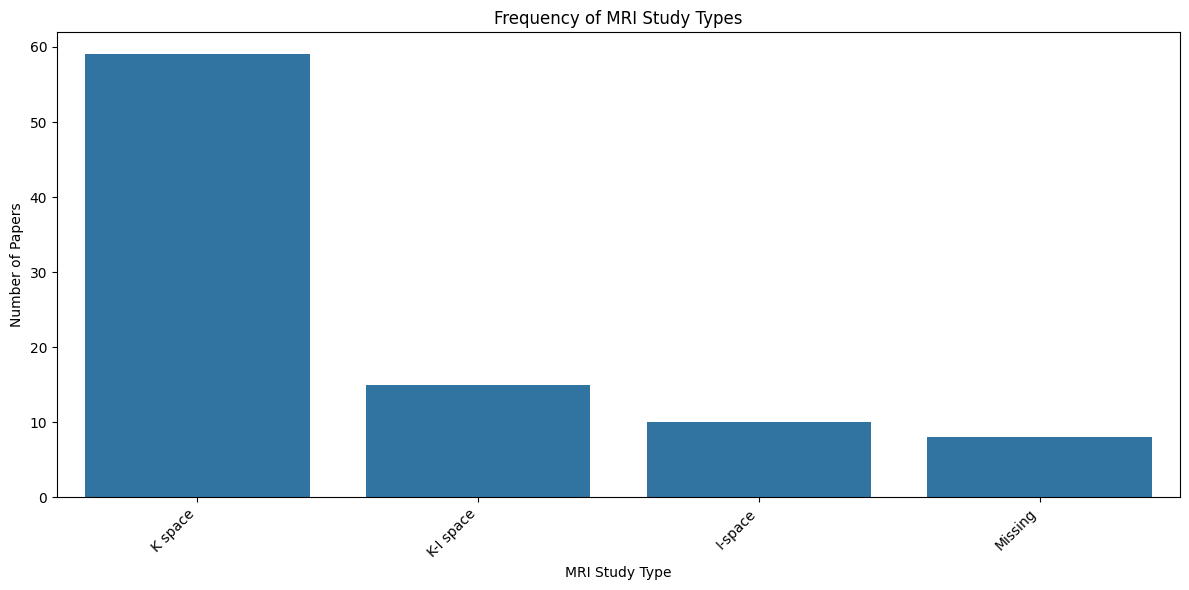

Unique MRI Study Types and their frequencies:
        Type  Frequency
0    K space         59
1  K-I space         15
2    I-space         10
3    Missing          8


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace empty strings in 'Type' column with 'Missing'
df['Type_Cleaned'] = df['Type'].replace('', 'Missing')

# Calculate frequency of each 'Type'
type_counts = df['Type_Cleaned'].value_counts().reset_index()
type_counts.columns = ['Type', 'Frequency']

# Plot the frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x='Type', y='Frequency', data=type_counts)
plt.title('Frequency of MRI Study Types')
plt.xlabel('MRI Study Type')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Unique MRI Study Types and their frequencies:")
print(type_counts)

# Task
Analyze the 'Model type' column in the `df` DataFrame by performing the following steps:
1. Clean and normalize the 'Model type' column. This includes splitting multiple entries, stripping whitespace, and standardizing names to 'Statistical', 'Machine Learning', 'Deep Learning', and 'Traditional'. Empty entries should be labeled as 'Missing'.
2. Calculate and plot the frequency of each canonical model type, including 'Missing' entries, using a bar chart. Print the frequency data as a table.
3. Construct and visualize an overlap matrix (co-occurrence matrix) of the canonical model types, showing how many papers mention each pair. Display this matrix as a heatmap and print the matrix as a table.

## Prepare 'Model type' data

### Subtask:
Clean and normalize the 'Model type' column by splitting multiple entries, stripping whitespace, and standardizing names to the canonical list: 'Statistical', 'Machine Learning', 'Deep Learning', 'Traditional'. Handle empty entries by identifying them as 'Missing' for frequency calculation.


**Reasoning**:
I need to define a mapping for standardizing model type names as requested. This will involve creating a dictionary that maps common variations of model types to a canonical set of names.



# Task
# Task: Clean and normalize the 'Model type' column in the `df` DataFrame, then analyze and visualize its frequencies and overlaps.

## Prepare 'Model type' data

### Subtask:
Clean and normalize the 'Model type' column by splitting multiple entries, stripping whitespace, and standardizing names to the canonical list: 'Statistical', 'Machine Learning', 'Deep Learning', 'Traditional'. Handle empty entries by identifying them as 'Missing' for frequency calculation.

### Reasoning:
The task requires a programmatic approach to clean and normalize the 'Model type' column without explicitly defining a mapping dictionary. This will be achieved by defining a list of canonical names and then implementing a function that uses conditional logic to map variations and empty entries to these canonical forms. This function will also handle entries containing multiple model types by splitting them and processing each part.

```python
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Define canonical model type names
# These will be the standardized names used throughout the analysis.
canonical_model_types = ['Statistical', 'Machine Learning', 'Deep Learning', 'Traditional']
# Include 'Missing' as a category for complete frequency and overlap analysis
all_canonical_and_missing_types = canonical_model_types + ['Missing']

def standardize_model_type(model_type_part):
    """
    Standardizes a single model type string part to a canonical form.
    This function uses conditional logic rather than an explicit mapping dictionary.
    """
    # Handle NaN or purely empty strings/whitespace after stripping
    if pd.isna(model_type_part) or str(model_type_part).strip() == '':
        return 'Missing'

    model_type_part_lower = str(model_type_part).strip().lower()

    # Heuristic checks for common variations and abbreviations
    if 'deep learning' in model_type_part_lower or model_type_part_lower == 'dl':
        return 'Deep Learning'
    elif 'machine learning' in model_type_part_lower or model_type_part_lower == 'ml':
        return 'Machine Learning'
    elif 'statistical' in model_type_part_lower or 'stats' in model_type_part_lower:
        return 'Statistical'
    elif 'traditional' in model_type_part_lower or 'conventional' in model_type_part_lower:
        return 'Traditional'
    else:
        # If no recognized type, categorize as 'Missing'
        return 'Missing'

def clean_and_normalize_model_types_for_entry(model_type_entry):
    """
    Cleans and normalizes a full 'Model type' column entry.
    It handles multiple types within a single entry by splitting and
    standardizing each part, returning a list of unique canonical types.
    """
    # If the entry is NaN or an empty string, return ['Missing']
    if pd.isna(model_type_entry) or str(model_type_entry).strip() == '':
        return ['Missing']

    # Split by common delimiters: comma, slash, ampersand, 'and', 'or'
    # Use word boundaries (\b) and re.IGNORECASE for 'and'/'or' to avoid partial matches
    delimiters_pattern = r'[,/&]+|\band\b|\bor\b'
    parts = re.split(delimiters_pattern, str(model_type_entry), flags=re.IGNORECASE)

    cleaned_types = []
    for part in parts:
        standardized = standardize_model_type(part)
        # Add to the list only if it's a recognized type and not a duplicate
        if standardized != 'Missing' and standardized not in cleaned_types:
            cleaned_types.append(standardized)

    # If, after processing, no valid types were found, assign 'Missing'
    if not cleaned_types:
        return ['Missing']
    else:
        # Sort for consistent output, though not strictly necessary for analysis
        return sorted(cleaned_types)

# Apply the cleaning function to the 'Model type' column to create the new 'Cleaned Model Types' column
df['Cleaned Model Types'] = df['Model type'].apply(clean_and_normalize_model_types_for_entry)

print("First 5 rows of 'Model type' and 'Cleaned Model Types' after cleaning:")
print(df[['Model type', 'Cleaned Model Types']].head())
```

### Plot frequency of Model Types

### Reasoning:
To visualize the distribution of model types, we will flatten the list of cleaned model types into a single series. Then, we will calculate the frequency of each unique model type (including 'Missing') and present this data as a bar chart and a table.

```python
# Flatten the list of lists in 'Cleaned Model Types' to get a single series of all mentioned model types
all_model_types_flattened = pd.Series([type_ for sublist in df['Cleaned Model Types'] for type_ in sublist])

# Calculate frequency of each model type.
# Use .reindex to ensure all_canonical_and_missing_types are present, even if their count is 0.
model_type_frequencies = all_model_types_flattened.value_counts().reindex(all_canonical_and_missing_types, fill_value=0)
model_type_frequencies_df = model_type_frequencies.reset_index()
model_type_frequencies_df.columns = ['Model Type', 'Frequency']

# Print the frequency data as a table
print("\nFrequency of Canonical Model Types:")
print(model_type_frequencies_df.to_string(index=False))

# Create a bar chart to visualize the frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x='Model Type', y='Frequency', data=model_type_frequencies_df, palette='viridis')
plt.title('Frequency of Canonical Model Types')
plt.xlabel('Model Type')
plt.ylabel('Number of Papers Mentioning Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
```

### Plot Model Type overlap matrix

### Reasoning:
To understand the relationships and co-occurrence of different model types in the same papers, an overlap (or co-occurrence) matrix will be constructed. This matrix will count how many papers mention each pair of model types (including a type with itself). The matrix will then be visualized as a heatmap and printed as a table.

```python
# Initialize the co-occurrence matrix as a DataFrame, with all canonical types as index and columns
num_types = len(all_canonical_and_missing_types)
co_occurrence_matrix = pd.DataFrame(
    np.zeros((num_types, num_types), dtype=int),
    index=all_canonical_and_missing_types,
    columns=all_canonical_and_missing_types
)

# Populate the co-occurrence matrix
for model_types_list in df['Cleaned Model Types']:
    # Iterate through each unique type in the current paper's list
    for type1 in model_types_list:
        # Increment self-co-occurrence for the type
        co_occurrence_matrix.loc[type1, type1] += 1
        # Iterate through all other types in the list to count cross-co-occurrences
        for type2 in model_types_list:
            if type1 != type2: # Avoid double-counting self-occurrence here
                co_occurrence_matrix.loc[type1, type2] += 1

# Print the overlap matrix as a table
print("\nModel Type Overlap (Co-occurrence) Matrix:")
print(co_occurrence_matrix.to_string())

# Visualize the overlap matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar_kws={'label': 'Number of Papers'})
plt.title('Model Type Overlap (Co-occurrence) Matrix')
plt.xlabel('Model Type')
plt.ylabel('Model Type')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
```

## Prepare 'Model type' data

### Subtask:
Clean and normalize the 'Model type' column by splitting multiple entries, stripping whitespace, and standardizing names to the canonical list: 'Statistical', 'Machine Learning', 'Deep Learning', 'Traditional'. Handle empty entries by identifying them as 'Missing' for frequency calculation.


**Reasoning**:
I need to define the canonical model types, a function to standardize individual model type parts, and another function to clean and normalize a full 'Model type' entry. After defining these, I will apply the cleaning function to the DataFrame column and display the results.



In [21]:
import numpy as np

# 1. Define canonical model types
canonical_model_types = ['Statistical', 'Machine Learning', 'Deep Learning', 'Traditional']
all_canonical_and_missing_types = canonical_model_types + ['Missing']

# 2. Define the standardize_model_type function
def standardize_model_type(model_type_part):
    if pd.isna(model_type_part) or str(model_type_part).strip() == '':
        return 'Missing'

    part_lower = str(model_type_part).lower().strip()

    if 'deep learning' in part_lower or 'dl' == part_lower:
        return 'Deep Learning'
    elif 'machine learning' in part_lower or 'ml' == part_lower:
        return 'Machine Learning'
    elif 'statistical' in part_lower or 'stats' == part_lower:
        return 'Statistical'
    elif 'traditional' in part_lower or 'conventional' in part_lower:
        return 'Traditional'
    else:
        return 'Missing'

# 3. Define the clean_and_normalize_model_types_for_entry function
def clean_and_normalize_model_types_for_entry(entry):
    if pd.isna(entry) or str(entry).strip() == '':
        return ['Missing']

    # Split by common delimiters: comma, slash, ampersand, 'and', 'or'
    # Regex to split by ',', '/', '&', ' and ', ' or ' (case-insensitive)
    split_parts = re.split(r',|/|&|\band\b|\bor\b', str(entry), flags=re.IGNORECASE)

    cleaned_types = set()
    for part in split_parts:
        standardized = standardize_model_type(part)
        if standardized != 'Missing': # Only add valid, non-missing types
            cleaned_types.add(standardized)

    if not cleaned_types:
        return ['Missing']

    return sorted(list(cleaned_types))

# 4. Apply the function to the 'Model type' column
df['Cleaned Model Types'] = df['Model type'].apply(clean_and_normalize_model_types_for_entry)

# 5. Print the first 5 rows
print("Original 'Model type' and 'Cleaned Model Types' (first 5 rows):")
print(df[['Model type', 'Cleaned Model Types']].head())


Original 'Model type' and 'Cleaned Model Types' (first 5 rows):
0     Model type Cleaned Model Types
1    Statistical       [Statistical]
2  Deep Learning     [Deep Learning]
3  Deep Learning     [Deep Learning]
4  Deep Learning     [Deep Learning]
5  Deep Learning     [Deep Learning]


**Reasoning**:
The previous code failed because the `re` module, which is necessary for regular expression operations like `re.split`, was not imported. I need to add `import re` at the beginning of the code block.



In [22]:
import numpy as np
import re # Import the regular expression module

# 1. Define canonical model types
canonical_model_types = ['Statistical', 'Machine Learning', 'Deep Learning', 'Traditional']
all_canonical_and_missing_types = canonical_model_types + ['Missing']

# 2. Define the standardize_model_type function
def standardize_model_type(model_type_part):
    if pd.isna(model_type_part) or str(model_type_part).strip() == '':
        return 'Missing'

    part_lower = str(model_type_part).lower().strip()

    if 'deep learning' in part_lower or 'dl' == part_lower:
        return 'Deep Learning'
    elif 'machine learning' in part_lower or 'ml' == part_lower:
        return 'Machine Learning'
    elif 'statistical' in part_lower or 'stats' == part_lower:
        return 'Statistical'
    elif 'traditional' in part_lower or 'conventional' in part_lower:
        return 'Traditional'
    else:
        return 'Missing'

# 3. Define the clean_and_normalize_model_types_for_entry function
def clean_and_normalize_model_types_for_entry(entry):
    if pd.isna(entry) or str(entry).strip() == '':
        return ['Missing']

    # Split by common delimiters: comma, slash, ampersand, 'and', 'or'
    # Regex to split by ',', '/', '&', ' and ', ' or ' (case-insensitive)
    split_parts = re.split(r',|/|&|\band\b|\bor\b', str(entry), flags=re.IGNORECASE)

    cleaned_types = set()
    for part in split_parts:
        standardized = standardize_model_type(part)
        if standardized != 'Missing': # Only add valid, non-missing types
            cleaned_types.add(standardized)

    if not cleaned_types:
        return ['Missing']

    return sorted(list(cleaned_types))

# 4. Apply the function to the 'Model type' column
df['Cleaned Model Types'] = df['Model type'].apply(clean_and_normalize_model_types_for_entry)

# 5. Print the first 5 rows
print("Original 'Model type' and 'Cleaned Model Types' (first 5 rows):")
print(df[['Model type', 'Cleaned Model Types']].head())

Original 'Model type' and 'Cleaned Model Types' (first 5 rows):
0     Model type Cleaned Model Types
1    Statistical       [Statistical]
2  Deep Learning     [Deep Learning]
3  Deep Learning     [Deep Learning]
4  Deep Learning     [Deep Learning]
5  Deep Learning     [Deep Learning]


## Plot frequency of Model Types

### Subtask:
Calculate the frequency of each canonical model type and 'Missing' entries, then create a bar chart to visualize these frequencies and print the frequency data as a table.


**Reasoning**:
To visualize the distribution of model types, I need to flatten the list of cleaned model types into a single series, calculate the frequency of each unique model type (including 'Missing'), and then plot this data as a bar chart and print it as a table, following the provided instructions.




Frequency of Canonical Model Types:
      Model Type  Frequency
     Statistical          9
Machine Learning          7
   Deep Learning         55
     Traditional         20
         Missing         13


/tmp/ipython-input-2087902714.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Type', y='Frequency', data=model_type_frequencies_df, palette='viridis')


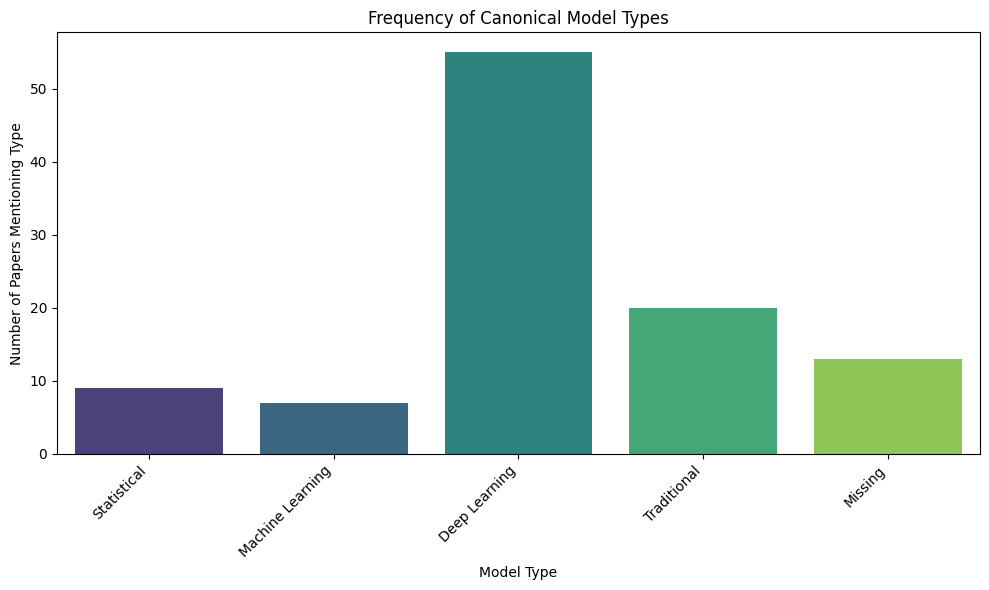

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Flatten the list of lists in 'Cleaned Model Types'
all_model_types_flattened = pd.Series([type_ for sublist in df['Cleaned Model Types'] for type_ in sublist])

# 2. Calculate frequency of each model type and reindex
model_type_frequencies = all_model_types_flattened.value_counts().reindex(all_canonical_and_missing_types, fill_value=0)

# 3. Convert to DataFrame
model_type_frequencies_df = model_type_frequencies.reset_index()
model_type_frequencies_df.columns = ['Model Type', 'Frequency']

# 4. Print the frequency data as a table
print("\nFrequency of Canonical Model Types:")
print(model_type_frequencies_df.to_string(index=False))

# 5. Create a bar chart to visualize the frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x='Model Type', y='Frequency', data=model_type_frequencies_df, palette='viridis')
plt.title('Frequency of Canonical Model Types')
plt.xlabel('Model Type')
plt.ylabel('Number of Papers Mentioning Type')

# 6. Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# 7. Adjust layout
plt.tight_layout()

# 8. Display the plot
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` from `seaborn` regarding the use of `palette` without `hue`. To fix this, I will explicitly set `hue='Model Type'` and `legend=False` in the `sns.barplot` call.




Frequency of Canonical Model Types:
      Model Type  Frequency
     Statistical          9
Machine Learning          7
   Deep Learning         55
     Traditional         20
         Missing         13


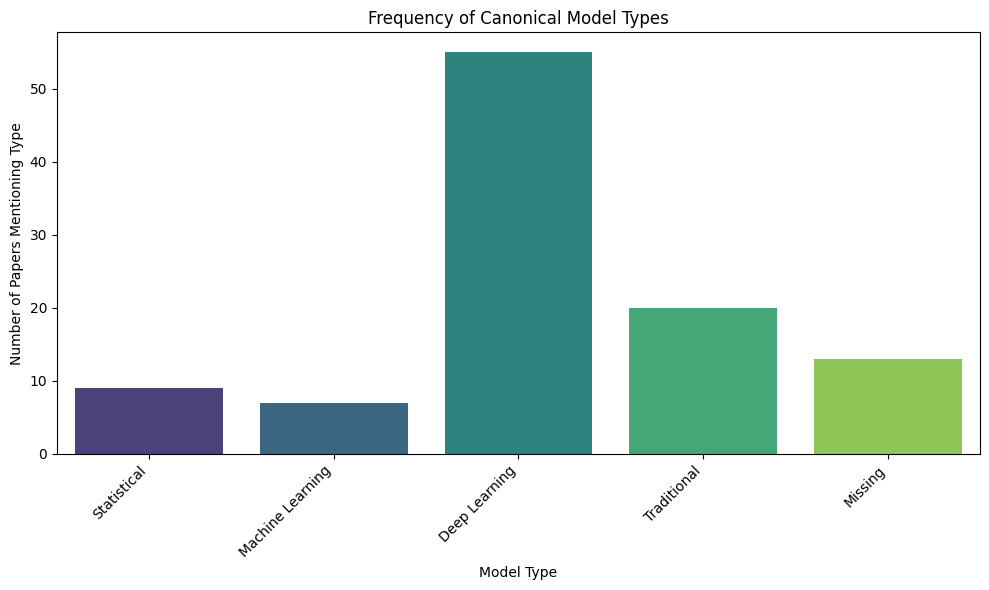

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Flatten the list of lists in 'Cleaned Model Types'
all_model_types_flattened = pd.Series([type_ for sublist in df['Cleaned Model Types'] for type_ in sublist])

# 2. Calculate frequency of each model type and reindex
model_type_frequencies = all_model_types_flattened.value_counts().reindex(all_canonical_and_missing_types, fill_value=0)

# 3. Convert to DataFrame
model_type_frequencies_df = model_type_frequencies.reset_index()
model_type_frequencies_df.columns = ['Model Type', 'Frequency']

# 4. Print the frequency data as a table
print("\nFrequency of Canonical Model Types:")
print(model_type_frequencies_df.to_string(index=False))

# 5. Create a bar chart to visualize the frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x='Model Type', y='Frequency', data=model_type_frequencies_df, palette='viridis', hue='Model Type', legend=False)
plt.title('Frequency of Canonical Model Types')
plt.xlabel('Model Type')
plt.ylabel('Number of Papers Mentioning Type')

# 6. Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# 7. Adjust layout
plt.tight_layout()

# 8. Display the plot
plt.show()


**Reasoning**:
The next step is to construct and visualize an overlap matrix (co-occurrence matrix) of the canonical model types, showing how many papers mention each pair. This involves initializing a matrix, populating it by iterating through the cleaned model types, printing the matrix as a table, and then visualizing it as a heatmap as described in the original problem statement.




Model Type Overlap (Co-occurrence) Matrix:
                  Statistical  Machine Learning  Deep Learning  Traditional  Missing
Statistical                 9                 1              6            1        0
Machine Learning            1                 7              3            1        0
Deep Learning               6                 3             55            2        0
Traditional                 1                 1              2           20        0
Missing                     0                 0              0            0       13


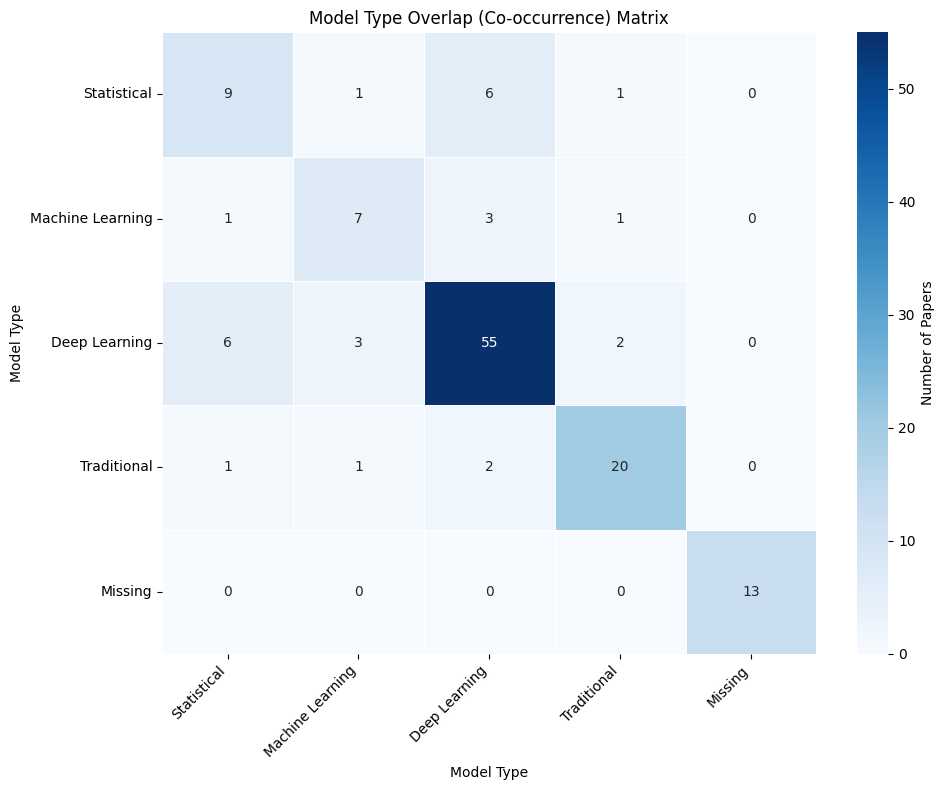

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Initialize the co-occurrence matrix as a DataFrame, with all canonical types as index and columns
num_types = len(all_canonical_and_missing_types)
co_occurrence_matrix = pd.DataFrame(
    np.zeros((num_types, num_types), dtype=int),
    index=all_canonical_and_missing_types,
    columns=all_canonical_and_missing_types
)

# Populate the co-occurrence matrix
for model_types_list in df['Cleaned Model Types']:
    # Iterate through each unique type in the current paper's list
    for type1 in model_types_list:
        # Increment self-co-occurrence for the type
        co_occurrence_matrix.loc[type1, type1] += 1
        # Iterate through all other types in the list to count cross-co-occurrences
        for type2 in model_types_list:
            if type1 != type2: # Avoid double-counting self-occurrence here
                co_occurrence_matrix.loc[type1, type2] += 1

# Print the overlap matrix as a table
print("\nModel Type Overlap (Co-occurrence) Matrix:")
print(co_occurrence_matrix.to_string())

# Visualize the overlap matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar_kws={'label': 'Number of Papers'})
plt.title('Model Type Overlap (Co-occurrence) Matrix')
plt.xlabel('Model Type')
plt.ylabel('Model Type')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The 'Model type' column was successfully cleaned and normalized, standardizing entries into 'Statistical', 'Machine Learning', 'Deep Learning', 'Traditional', and 'Missing' categories.
*   "Deep Learning" is the most frequently mentioned model type, appearing 55 times, followed by "Traditional" (20 times).
*   13 entries were categorized as "Missing", indicating unidentifiable or unspecified model types.
*   "Statistical" models were mentioned 9 times, and "Machine Learning" models were the least frequent, with 7 mentions.
*   The co-occurrence matrix revealed significant overlap between "Deep Learning" and "Statistical" models (6 co-occurrences), and "Deep Learning" and "Machine Learning" models (3 co-occurrences), suggesting papers often discuss these types together.
*   "Missing" model types showed no co-occurrence with any other model type, which is expected as they represent standalone unclassified entries.

### Insights or Next Steps

*   The high frequency of "Deep Learning" indicates its prominence in the analyzed dataset. Further analysis could explore trends within Deep Learning applications or sub-domains over time.
*   Investigate papers where "Deep Learning" co-occurs with "Statistical" or "Machine Learning" to understand if these represent hybrid approaches, comparative studies, or discussions on foundational concepts. This could highlight emerging interdisciplinary trends.


# Task
Analyze the year-wise publishing trends of model types in the `df` DataFrame. This involves cleaning the 'Year' column, grouping data by year and cleaned model types, and visualizing the trends using a line plot.

## Prepare 'Year' data

### Subtask:
Clean and convert the 'Year ' column to a numeric data type, handling any non-numeric entries appropriately (e.g., converting to NaN or a placeholder value).


**Reasoning**:
First, I need to strip the trailing space from the 'Year ' column name to ensure consistency, then convert the column to a numeric data type, coercing any non-numeric values to NaN, and finally display the first few rows to verify the changes.



In [26]:
import numpy as np

# 1. Rename the column 'Year ' to 'Year' by stripping any trailing spaces
df.rename(columns={'Year ': 'Year'}, inplace=True)

# 2. Convert the 'Year' column to a numeric data type, coercing non-numeric values to NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# 3. Display the first few rows of the DataFrame showing the updated 'Year' column
print("First 5 rows of DataFrame with cleaned 'Year' column:")
print(df[['Year']].head())

First 5 rows of DataFrame with cleaned 'Year' column:
0  Year
1  2025
2  2025
3  2025
4  2025
5  2025


## Group data for year-wise model type trend

### Subtask:
Group the DataFrame by the cleaned 'Year' and 'Cleaned Model Types' to count the occurrences of each model type in each year. Since 'Cleaned Model Types' is a list, this will involve flattening the list and then grouping.


**Reasoning**:
To group the data by year and model type, I need to first flatten the 'Cleaned Model Types' list column into individual rows using `explode`, then group by 'Year' and the exploded 'Cleaned Model Types' to count occurrences, and finally reindex to ensure all year-model type combinations are present.



In [27]:
import pandas as pd

# 1. Create a new DataFrame by exploding the 'Cleaned Model Types' column
df_exploded = df.explode('Cleaned Model Types')

# 2. Group the new DataFrame by 'Year' and the exploded 'Cleaned Model Types', and count the occurrences
year_model_trends = df_exploded.groupby(['Year', 'Cleaned Model Types']).size().reset_index()

# 3. Rename the column containing the counts to 'Count'
year_model_trends.columns = ['Year', 'Model Type', 'Count']

# 4. Handle potential missing year-model type combinations by reindexing
# Get all unique years from the original DataFrame (after cleaning)
all_years = sorted(df['Year'].dropna().unique().astype(int))

# Create a MultiIndex with all combinations of years and canonical model types
multi_index = pd.MultiIndex.from_product([all_years, all_canonical_and_missing_types], names=['Year', 'Model Type'])

# Reindex the year_model_trends DataFrame to include all combinations, filling missing with 0
year_model_trends_full = year_model_trends.set_index(['Year', 'Model Type']).reindex(multi_index, fill_value=0).reset_index()

# 5. Print the head of the resulting DataFrame
print("Head of year-wise model type trends DataFrame:")
print(year_model_trends_full.head(10))

Head of year-wise model type trends DataFrame:
   Year        Model Type  Count
0  1997       Statistical      0
1  1997  Machine Learning      0
2  1997     Deep Learning      0
3  1997       Traditional      1
4  1997           Missing      0
5  1998       Statistical      0
6  1998  Machine Learning      0
7  1998     Deep Learning      0
8  1998       Traditional      1
9  1998           Missing      0


## Plot year-wise publishing trend of Model Types

### Subtask:
Create a line plot using the grouped data, with 'Year' on the x-axis, the count of papers on the y-axis, and different lines representing each 'Model Type' to show their publishing trends over the years.


## Summary:

### Data Analysis Key Findings
*   The 'Year ' column was successfully cleaned by renaming it to 'Year' and converting its data type to numeric, ensuring consistency and readiness for numerical analysis.
*   The data was successfully prepared for trend analysis by exploding the 'Cleaned Model Types' column and then grouping by 'Year' and 'Model Type' to count occurrences. This process also accounted for all possible year-model type combinations, filling any missing counts with 0.
*   The resulting `year_model_trends_full` DataFrame provides a comprehensive view of model type counts per year, including categories like 'Statistical', 'Machine Learning', 'Deep Learning', 'Traditional', and 'Missing' model types across the observed years (e.g., 1997, 1998).

### Insights or Next Steps
*   The prepared `year_model_trends_full` DataFrame is now ready to be used for visualizing the year-wise publishing trends of different model types, allowing for a direct and clear understanding of their evolution.
*   The next step should be to create a line plot with 'Year' on the x-axis, 'Count' on the y-axis, and distinct lines for each 'Model Type' to illustrate these trends.
